# Decision Tree

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv(r"C:\Users\OM\program by om unde\Machine Learning Practice\Datasets\autism_screening.csv",na_values='?',header=None)

In [5]:
df.shape

(705, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       705 non-null    object
 1   1       705 non-null    object
 2   2       705 non-null    object
 3   3       705 non-null    object
 4   4       705 non-null    object
 5   5       705 non-null    object
 6   6       705 non-null    object
 7   7       705 non-null    object
 8   8       705 non-null    object
 9   9       705 non-null    object
 10  10      703 non-null    object
 11  11      705 non-null    object
 12  12      610 non-null    object
 13  13      705 non-null    object
 14  14      705 non-null    object
 15  15      705 non-null    object
 16  16      705 non-null    object
 17  17      705 non-null    object
 18  18      705 non-null    object
 19  19      610 non-null    object
 20  20      705 non-null    object
dtypes: object(21)
memory usage: 115.8+ KB


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
1,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
2,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
3,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
4,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,705,705,705,705,705,705,705,705,705,705,...,705,610,705,705,705,705,705,705,610,705
unique,3,3,3,3,3,3,3,3,3,3,...,3,12,3,3,68,3,12,2,6,3
top,1,0,0,0,0,0,0,1,0,1,...,m,White-European,no,no,United States,no,4.0,18 and more,Self,NO
freq,508,385,382,355,353,504,410,457,476,404,...,367,233,635,613,113,692,131,704,522,515


In [9]:
column_names = list(df.columns)
print(column_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [10]:
col_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
df.columns=col_names 

In [11]:
labels=df[20].unique().tolist()
labels

['Class/ASD', 'NO', 'YES']

In [12]:
lbl_enc=OrdinalEncoder()
for i in col_names:
    df[i]=lbl_enc.fit_transform(df[[i]])

In [13]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,10.0,0.0,0.0,67.0,1.0,11.0,1.0,5.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,9.0,1.0,1.0,64.0,0.0,7.0,0.0,4.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,3.0,1.0,2.0,13.0,0.0,6.0,0.0,4.0,1.0
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2.0,3.0,2.0,2.0,56.0,0.0,9.0,0.0,2.0,2.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,9.0,1.0,2.0,64.0,0.0,7.0,0.0,4.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,NaN,1.0,1.0,22.0,0.0,3.0,0.0,NaN,1.0
6,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2.0,5.0,2.0,1.0,64.0,0.0,10.0,0.0,4.0,2.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,64.0,0.0,3.0,0.0,4.0,1.0
8,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,9.0,1.0,1.0,43.0,0.0,6.0,0.0,2.0,1.0
9,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,2.0,9.0,1.0,1.0,64.0,0.0,7.0,0.0,4.0,1.0


In [14]:
X = df.drop([20], axis=1)
y = df[20] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 50)

In [16]:
entropy_clf = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0)

entropy_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [17]:
print('Training Accuracy:', entropy_clf.score(X_train,y_train))
print('Test Accuracy:', entropy_clf.score(X_test,y_test))

Training Accuracy: 0.9957627118644068
Test Accuracy: 1.0


[Text(0.75, 0.9, 'x[17] <= 7.5\nentropy = 0.849\nsamples = 472\nvalue = [1, 348, 123]'),
 Text(0.625, 0.7, 'x[17] <= 2.5\nentropy = 0.287\nsamples = 363\nvalue = [0, 348, 15]'),
 Text(0.5, 0.5, 'x[12] <= 8.0\nentropy = 0.933\nsamples = 43\nvalue = [0, 28, 15]'),
 Text(0.25, 0.3, 'x[9] <= 0.5\nentropy = 0.634\nsamples = 25\nvalue = [0, 21, 4]'),
 Text(0.125, 0.1, 'entropy = 0.634\nsamples = 20\nvalue = [0, 20, 0]'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.75, 0.3, 'x[17] <= 1.5\nentropy = 0.964\nsamples = 18\nvalue = [0, 7, 11]'),
 Text(0.625, 0.1, 'entropy = 0.592\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.875, 0.1, 'entropy = 0.994\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(0.75, 0.5, 'entropy = 0.0\nsamples = 320\nvalue = [0, 320, 0]'),
 Text(0.875, 0.7, 'entropy = 0.0\nsamples = 109\nvalue = [1, 0, 108]')]

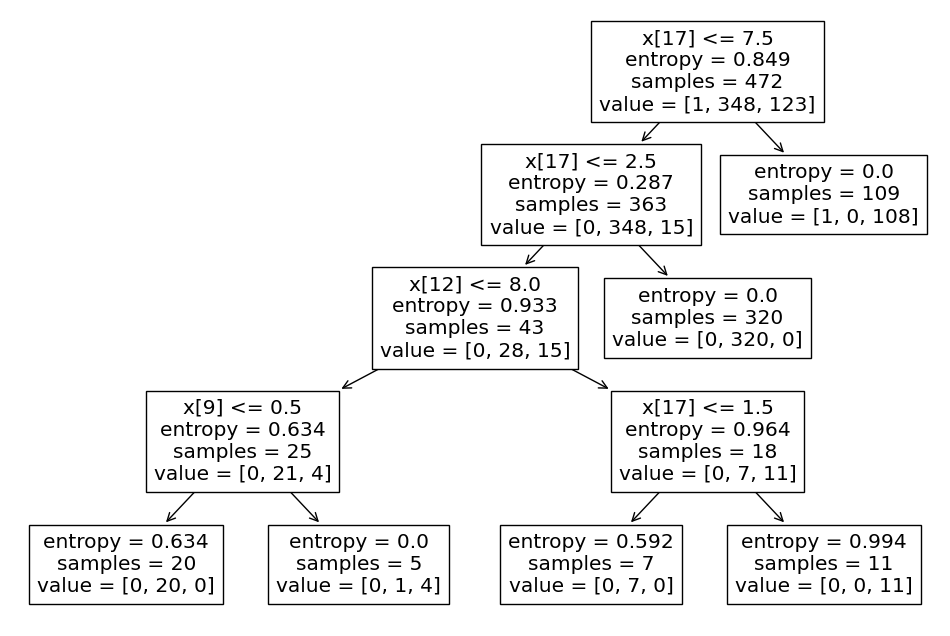

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(entropy_clf.fit(X_train, y_train)) 

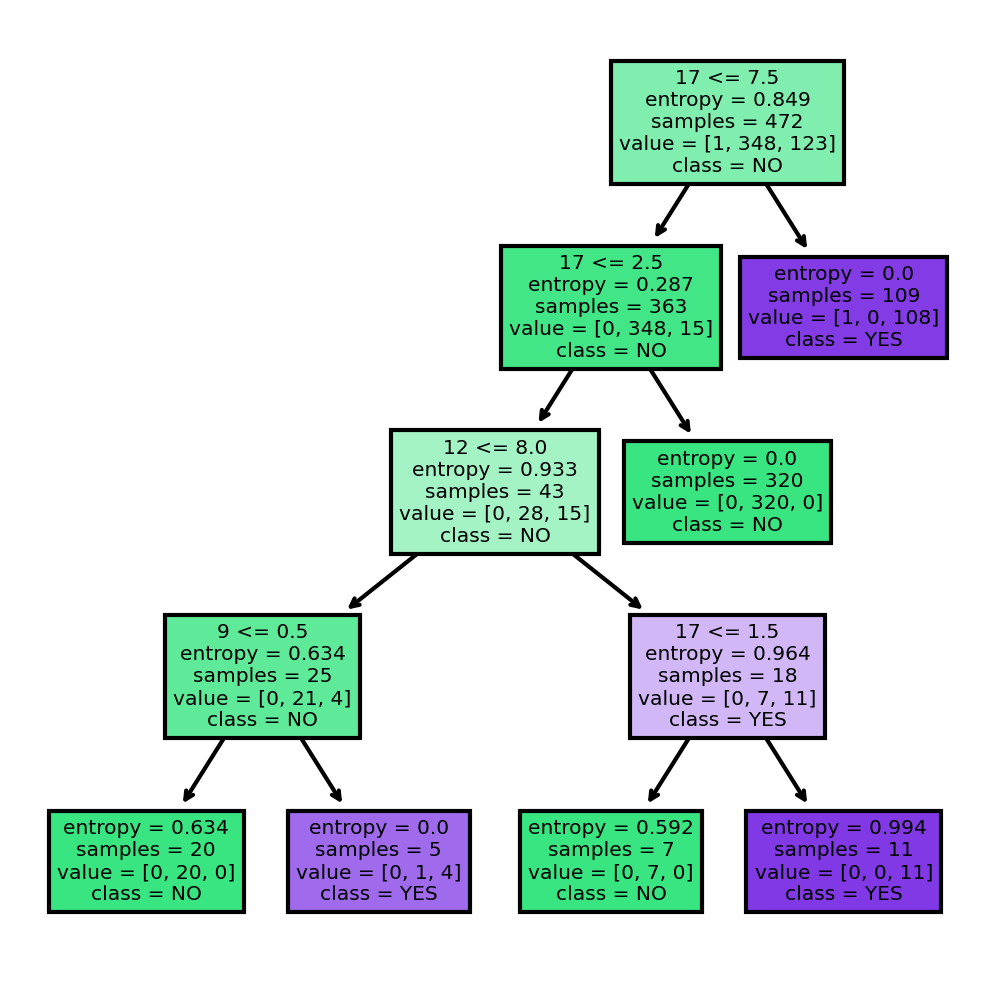

In [19]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropy_clf,feature_names = col_names,class_names=labels,filled = True);
fig.savefig('imagename.png')